In [19]:
from pathlib import Path

import pandas as pd
from tslearn.clustering import TimeSeriesKMeans

import matplotlib.pyplot as plt

In [10]:
data_path = Path().resolve().parent / "data"
result_path = data_path / "result"

In [13]:
demand_history_df = pd.read_csv(data_path / "Demand_History.csv")

In [14]:
years_column = [str(year) for year in range(2010, 2019)]
X = demand_history_df[years_column]

## Clustering

In [36]:
nb_cluster = 3
km = TimeSeriesKMeans(n_clusters=nb_cluster, metric="dtw", max_iter=5, random_state=0).fit(X)

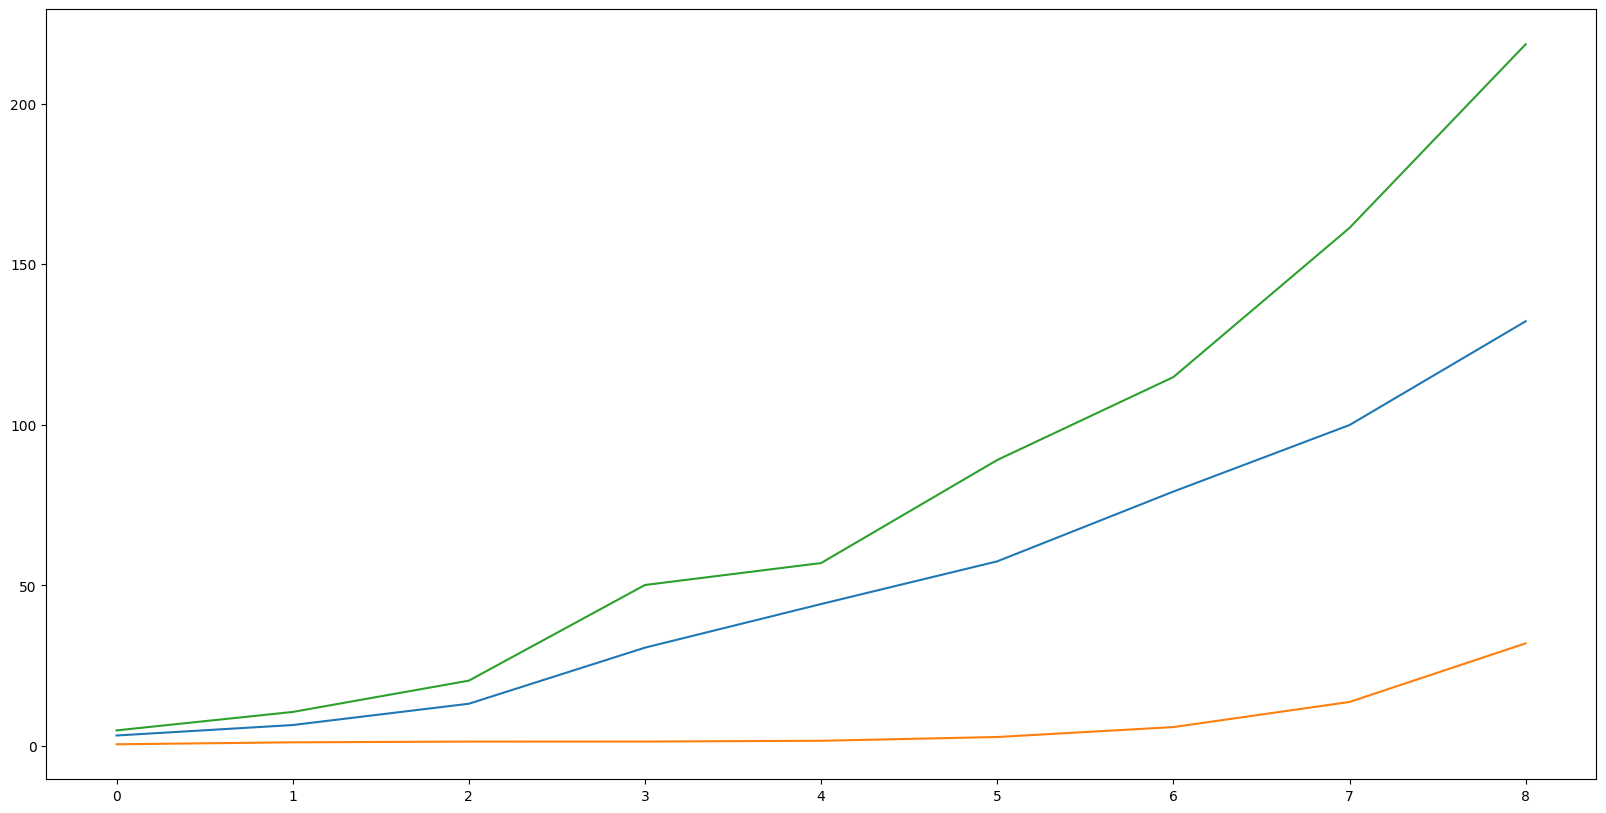

In [37]:
centers = km.cluster_centers_
plt.figure(figsize=(20, 10))
for cluster_id in range(nb_cluster):
    plt.plot(range(len(years_column)), centers[cluster_id, :].reshape(-1))

# Normalized Time series clustering

In [49]:
normalized_X = X.apply(lambda x: x/max(x) if max(x)!=0 else 0, axis=1)

## Clusteing

In [57]:
nb_cluster = 4
normalized_km = TimeSeriesKMeans(n_clusters=nb_cluster, metric="dtw", max_iter=5, random_state=0).fit(normalized_X)

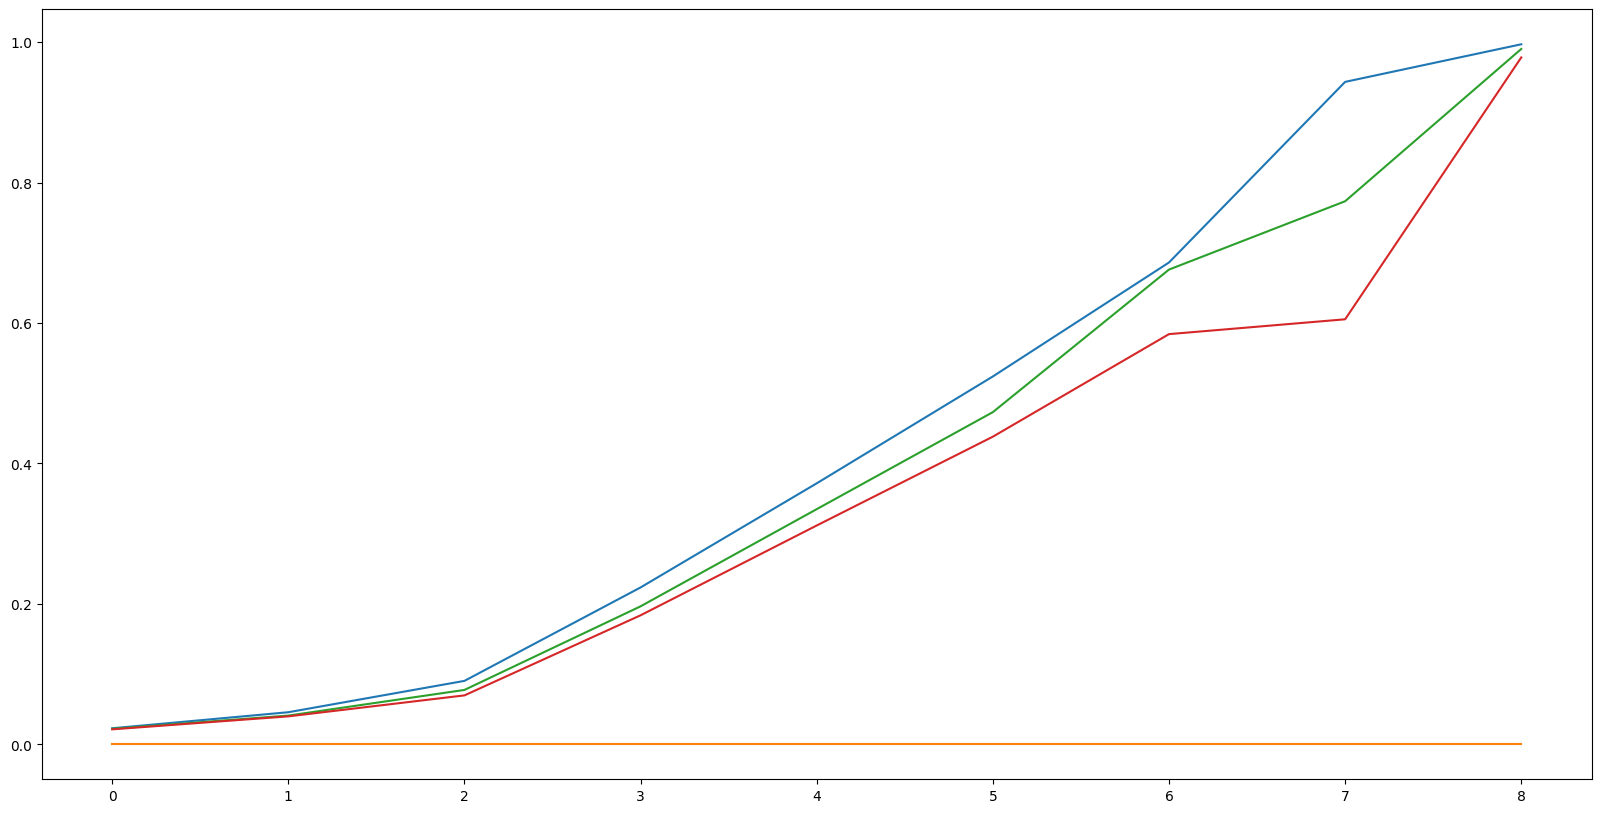

In [58]:
normalized_centers = normalized_km.cluster_centers_
plt.figure(figsize=(20, 10))
for cluster_id in range(nb_cluster):
    plt.plot(range(len(years_column)), normalized_centers[cluster_id, :].reshape(-1))
